 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [302]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [303]:
whale_df=pd.read_csv('whale_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)

In [304]:
#detecting nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [305]:
# Droping nulls
whale_df=whale_df.dropna()

In [306]:
#checking data
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [307]:
# Reading algorithmic returns
algo_df=pd.read_csv('algo_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)

In [308]:
# Count nulls
algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [309]:
# Drop nulls
algo_df.dropna(inplace=True)

In [310]:
#checking data
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [311]:
# Reading S&P TSX 60 Closing Prices
sp60_df=pd.read_csv('sp_tsx_history.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)


In [312]:
# Check Data Types
sp60_df.dtypes
sp60_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [313]:
# Fix Data Types
#need to remove $ and , as well as change type to float
sp60_df['Close']=sp60_df['Close'].str.replace('$','', regex = True)
sp60_df['Close']=sp60_df['Close'].str.replace(',','', regex = True)
sp60_df['Close']=sp60_df['Close'].astype('float')


In [314]:
#checking data
sp60_df['Close']

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [315]:
# Calculate Daily Returns
daily_sp60_df=sp60_df.pct_change()

In [316]:
#dropping null
daily_sp60_df=daily_sp60_df.dropna()

In [317]:
# Rename `Close` Column to be specific to this portfolio.
#renaming to portfolio name
daily_sp60_df.columns = ['S&P TSX 60']

In [318]:
#checking data
daily_sp60_df.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [319]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#using concat function
returns_df=pd.concat([daily_sp60_df, algo_df, whale_df], axis=1, join='inner')

In [320]:
#checking data
returns_df.head()

,S&P TSX 60,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

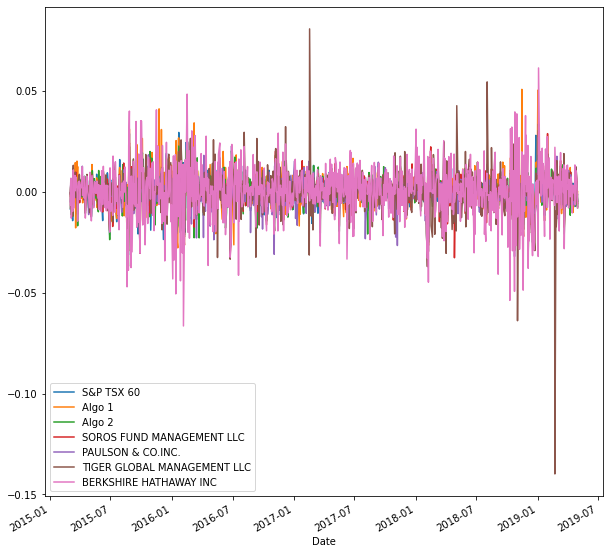

In [321]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(10,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

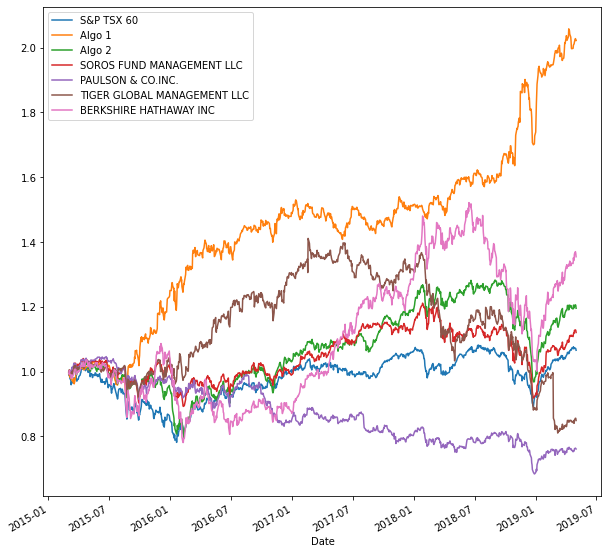

In [322]:
# Calculate cumulative returns of all portfolios
cureturns_df=(1+returns_df).cumprod()
# Plot cumulative returns
cureturns_df[::].plot(figsize=(10,10))

Most of the portfolios outperform the S&P TSX 60 with the exception of Tiger Global Management and Paulson & Co.inc. Algo 1 was the best performing.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

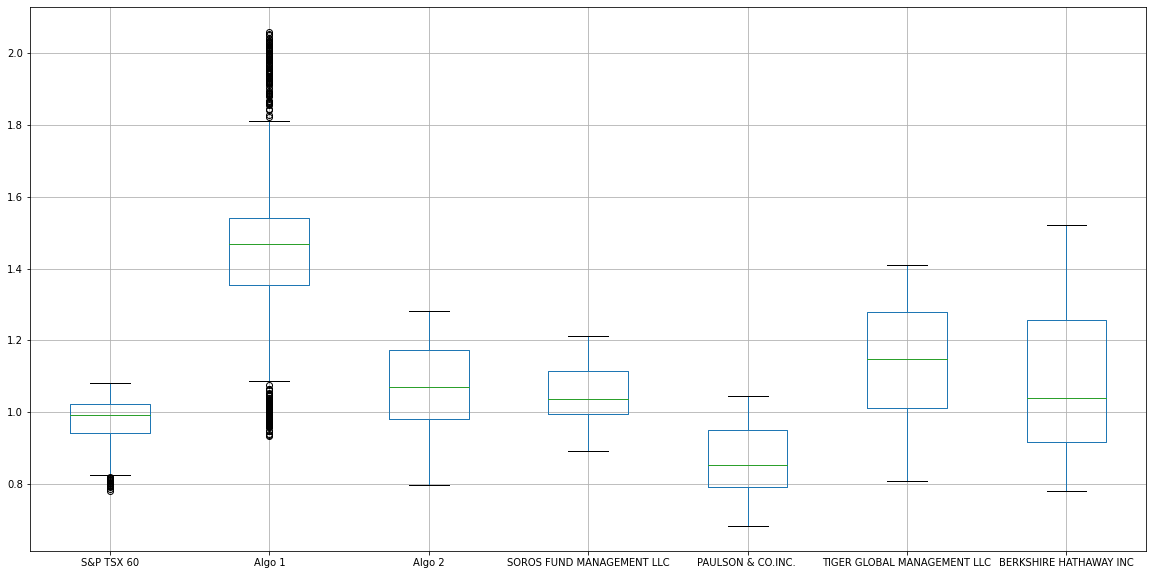

In [323]:
# Box plot to visually show risk
cureturns_df[::].boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [324]:
# Calculate the daily standard deviations of all portfolios
returnstd_df=returns_df.std()
print(returnstd_df)

S&P TSX 60                     0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

#### Calculate  the daily standard deviation of S&P TSX 60
Daily standard deviation of S&P TSX 60 is 0.007034
#### Determine which portfolios are riskier than the S&P TSX 60
All Portfolios are more risky due to higher standard deviation except for Paulson & Co.inc

### Calculate the Annualized Standard Deviation

In [325]:
# Calculate the annualized standard deviation (252 trading days)
# annualise by multiplying by sqrt(252)
annual_returnstd_df=returnstd_df*np.sqrt(252)
print(annual_returnstd_df)

S&P TSX 60                     0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

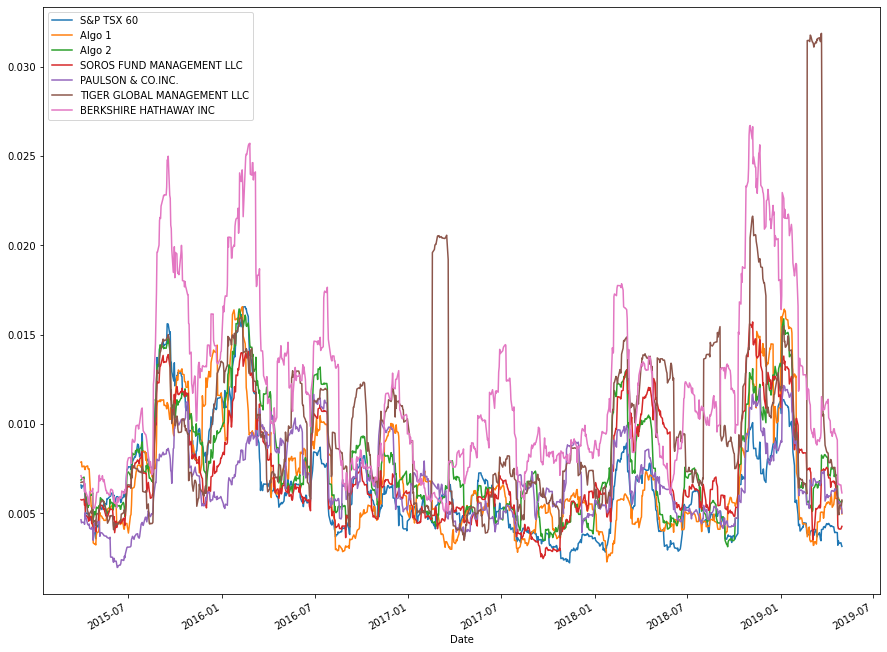

In [326]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_df=returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_df[::].plot(figsize=(15,12))

### Calculate and plot the correlation

In [327]:
# Calculate the correlation
corr_df=returns_df.corr()
# Display de correlation matrix
print(corr_df)

                             S&P TSX 60    Algo 1    Algo 2  \
S&P TSX 60                     1.000000  0.310276  0.737370   
Algo 1                         0.310276  1.000000  0.285455   
Algo 2                         0.737370  0.285455  1.000000   
SOROS FUND MANAGEMENT LLC      0.673930  0.313795  0.826667   
PAULSON & CO.INC.              0.486511  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC    0.440583  0.161236  0.506689   
BERKSHIRE HATHAWAY INC         0.557250  0.289378  0.684609   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
S&P TSX 60                                    0.673930            0.486511   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC

<AxesSubplot:>

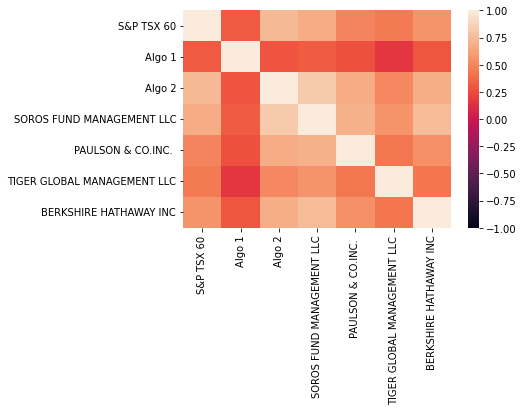

In [328]:
#Putting in headmap for visualisation
sns.heatmap(corr_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 2'}, xlabel='Date'>

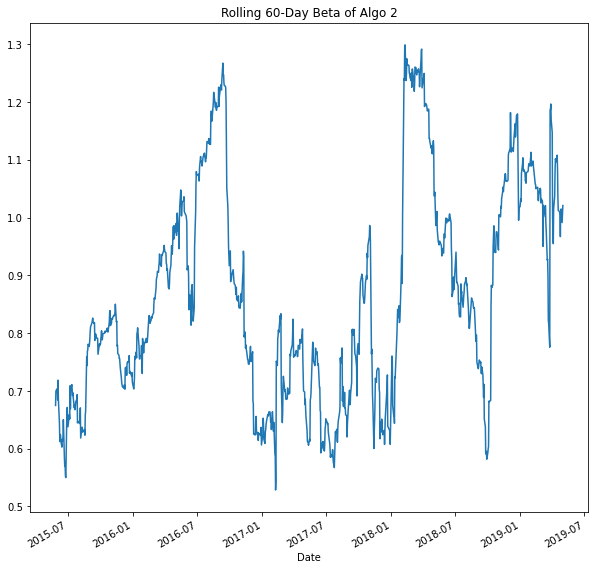

In [329]:
# Calculate covariance of a single portfolio
covariance=returns_df['Algo 2'].rolling(window=60).cov(returns_df['S&P TSX 60'])
# Calculate variance of S&P TSX
variance=returns_df['S&P TSX 60'].rolling(window=60).var()
# Computing beta
beta=covariance/variance
# Plot beta trend
beta.plot(figsize=(10,10), title='Rolling 60-Day Beta of Algo 2')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

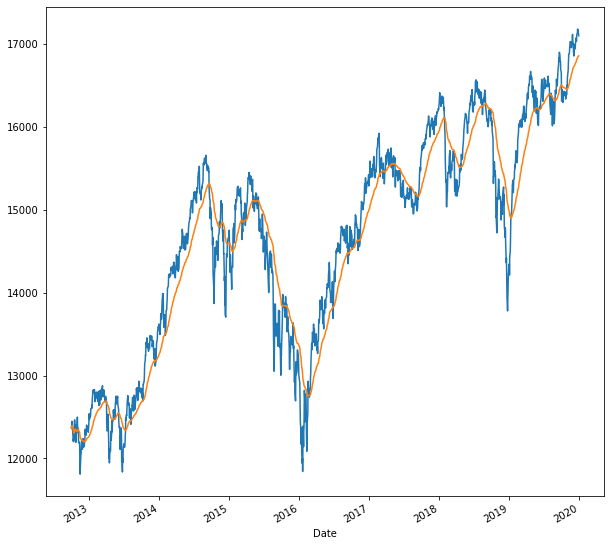

In [330]:
# Use `ewm` to calculate the rolling window
#doesnt specifiy which portfolio so I choose the TSX 60
ewm_df=sp60_df['Close'].ewm(halflife=21).mean()
ax=sp60_df['Close'].plot(figsize=(10,10))
ewm_df.plot(ax=ax)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [331]:
# Annualized Sharpe Ratios
# no risk free rate is given so 0 is assumed
sharpe_ratios = (returns_df.mean() * 252) / (annual_returnstd_df)

<AxesSubplot:>

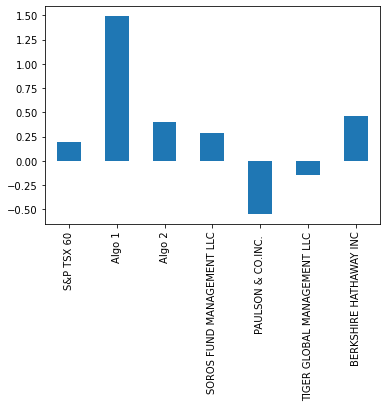

In [332]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 perfromed very well with an outstanding sharpe ratio far above its competitors, easily outperforming the S&P TSX 60 and the whale portfolios. Algo 2 also performed well outperforming the S&P TSX 60 and most of the whale portfolios with the exception of Berkshire Hathaway

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [333]:
# call in csvs
goog_df=pd.read_csv('goog.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)
twtr_df=pd.read_csv('twtr.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)
fb_df=pd.read_csv('fb.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)

In [334]:
#check for nulls
print(goog_df.isna().sum())
print(twtr_df.isna().sum())
print(fb_df.isna().sum())

Close    0
dtype: int64
Close    0
dtype: int64
Close    0
dtype: int64


In [335]:
# Reading data to see how it looks
print(goog_df.head())
print(twtr_df.head())
print(fb_df.head())

                      Close
Date                       
2015-01-02 16:00:00  523.37
2015-01-05 16:00:00  512.46
2015-01-06 16:00:00  500.59
2015-01-07 16:00:00  499.73
2015-01-08 16:00:00  501.30
                     Close
Date                      
2015-01-02 16:00:00  36.56
2015-01-05 16:00:00  36.38
2015-01-06 16:00:00  38.76
2015-01-07 16:00:00  37.28
2015-01-08 16:00:00  39.09
                     Close
Date                      
2015-01-02 16:00:00  78.45
2015-01-05 16:00:00  77.19
2015-01-06 16:00:00  76.15
2015-01-07 16:00:00  76.15
2015-01-08 16:00:00  78.18


In [336]:
# Combine all stocks in a single DataFrame
combined_df=pd.concat([goog_df, twtr_df, fb_df], axis=1, join='inner')
combined_df.head()

,Close,Close,Close
Date,,,
2015-01-02 16:00:00,523.37,36.56,78.45
2015-01-05 16:00:00,512.46,36.38,77.19
2015-01-06 16:00:00,500.59,38.76,76.15
2015-01-07 16:00:00,499.73,37.28,76.15
2015-01-08 16:00:00,501.30,39.09,78.18


In [337]:
#renaming columns
combined_df.columns=['GOOG','TWTR','FB']
combined_df.head()

,GOOG,TWTR,FB
Date,,,
2015-01-02 16:00:00,523.37,36.56,78.45
2015-01-05 16:00:00,512.46,36.38,77.19
2015-01-06 16:00:00,500.59,38.76,76.15
2015-01-07 16:00:00,499.73,37.28,76.15
2015-01-08 16:00:00,501.30,39.09,78.18


In [338]:
# Calculate daily returns
combined_returns=combined_df.pct_change()
# Drop NAs
combined_returns=combined_returns.dropna()
# Display sample data
combined_returns.head()

,GOOG,TWTR,FB
Date,,,
2015-01-05 16:00:00,-0.020846,-0.004923,-0.016061
2015-01-06 16:00:00,-0.023163,0.065421,-0.013473
2015-01-07 16:00:00,-0.001718,-0.038184,0.000000
2015-01-08 16:00:00,0.003142,0.048552,0.026658
2015-01-09 16:00:00,-0.012946,0.027629,-0.005628


In [339]:
# Fixing date index to not have time
# Resetting index
combined_returns=combined_returns.reset_index()
# Removing time stamp
combined_returns['Date']=pd.to_datetime(combined_returns['Date']).dt.date
# Reinstating Index
combined_returns=combined_returns.set_index('Date')
combined_returns=combined_returns.sort_index()
# Check data
combined_returns.head()

,GOOG,TWTR,FB
Date,,,
2015-01-05,-0.020846,-0.004923,-0.016061
2015-01-06,-0.023163,0.065421,-0.013473
2015-01-07,-0.001718,-0.038184,0.000000
2015-01-08,0.003142,0.048552,0.026658
2015-01-09,-0.012946,0.027629,-0.005628


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [340]:
#initalise dataframe
custom_df=pd.DataFrame()
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_return=combined_returns.dot(weights)
#adding to dataframe
custom_df['Custom']=weighted_return
# Display sample data
custom_df.head()


,Custom
Date,
2015-01-05,-0.013943
2015-01-06,0.009595
2015-01-07,-0.013301
2015-01-08,0.026117
2015-01-09,0.003018


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [341]:
# Join your returns DataFrame to the original returns DataFrame
all_returns=pd.concat([returns_df, custom_df], axis=1, join='inner')

C:\Users\peeta\anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


In [342]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.head()

,S&P TSX 60,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Custom
Date,,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.002333
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,0.004308
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.000872
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.013576
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.004298


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [343]:
# Calculate the annualized `std`
annual_std=all_returns.std()*np.sqrt(252)
print(annual_std)

S&P TSX 60                     0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Custom                         0.267751
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

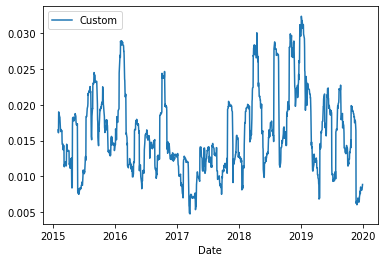

In [344]:
# Calculate rolling standard deviation
custom_std=custom_df.rolling(window=21).std()
# Plot the rolling standard deviation
custom_std.plot()


<AxesSubplot:xlabel='Date'>

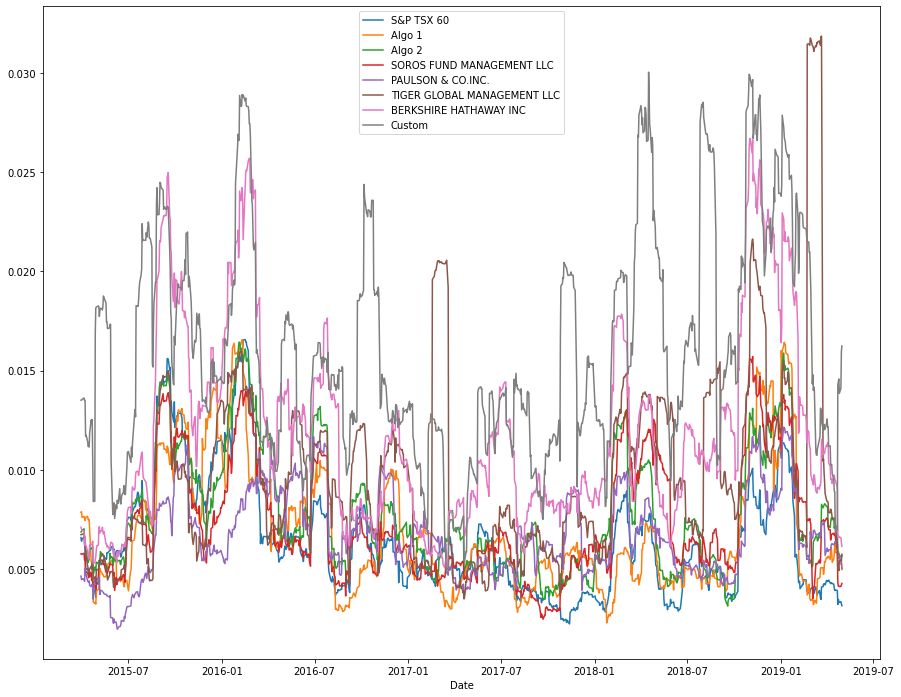

In [345]:
#comparing to all portfolios
all_std=all_returns.rolling(window=21).std()
all_std.plot(figsize=(15,12))

### Calculate and plot the correlation

<AxesSubplot:>

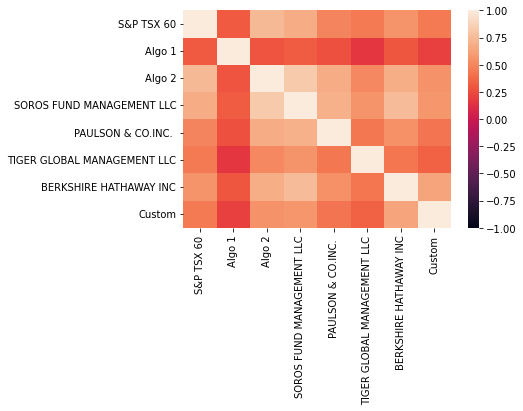

In [346]:
# Calculate and plot the correlation
custom_corr=all_returns.corr()
sns.heatmap(custom_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}, xlabel='Date'>

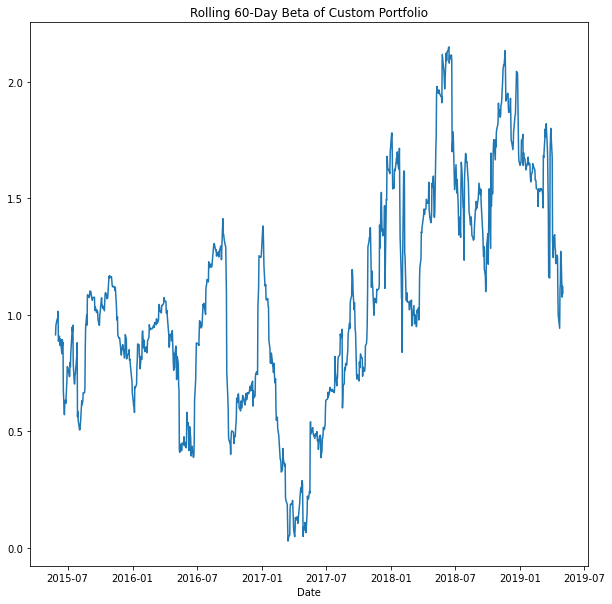

In [347]:
# Calculate covariance of custom portfolio
covariance=all_returns['Custom'].rolling(window=60).cov(all_returns['S&P TSX 60'])
# Calculate variance of S&P TSX
variance=all_returns['S&P TSX 60'].rolling(window=60).var()
# Computing beta
beta=covariance/variance
# Plot beta trend
beta.plot(figsize=(10,10), title='Rolling 60-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [348]:
# Calculate Annualized Sharpe Ratios
# no risk free rate is given so 0 is assumed
sharpe_ratios_custom = (all_returns.mean() * 252) / (annual_std)

<AxesSubplot:>

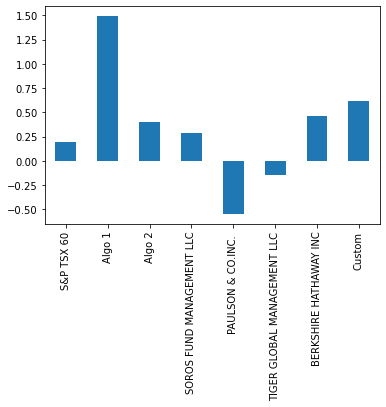

In [349]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

The custom portfolio has the highest standard deviation out of all portfolios making it the riskiest option. The custom portfolio does perform well in comparison with its risk however as it has the 2nd best sharpe ratio. From 2018-2019 the custom portfolio had quite high beta in comparison with the S&P TSX 60 indicating high volitilaty in recent years